

<h2 align="center">Simple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

Useful for using historical data for predicting output variable. Widely used in predictive modeling.

Applications: Economics, Healthcare, social sciences, business etc

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

Loading the Data and Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [2]:
advert =  pd.read_csv(r'Advertising.csv')
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Remove the index column

In [4]:
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
advert.drop(['Unnamed: 0'], axis=1, inplace=True)
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Exploratory Data Analysis

EDA through data visualization is important to analyse data. Knowledge of domain will take precedance over statiscal tools

Seaborn is used for data visualization


Response Variable: Sales

Predictors: TV, Radio, newspaper

<AxesSubplot:xlabel='sales'>

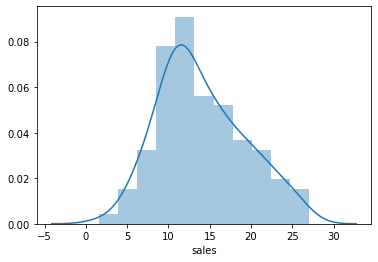

In [6]:
import seaborn as sns
sns.distplot(advert.sales)

<AxesSubplot:xlabel='newspaper'>

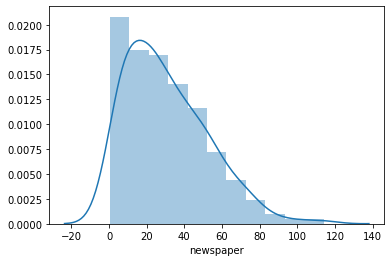

In [7]:
sns.distplot(advert.newspaper)

<AxesSubplot:xlabel='radio'>

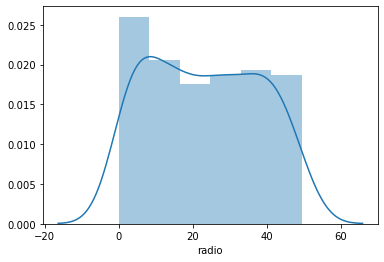

In [8]:
sns.distplot(advert.radio)

<AxesSubplot:xlabel='TV'>

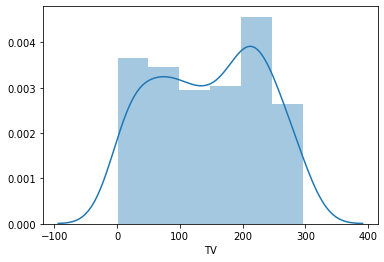

In [9]:
sns.distplot(advert.TV)

Inferences from Data visualization:

1. Sales:Normal Distribution of data
2. Newspaper: Sales relatively low and skewed to the right
3. Radio: Uniform distrbution and relatively low
4. TV: Uniform distribution and relatively high

### Exploring Relationships between Predictors and Response

Simple Linear regression is a univariable regression hence only one of the 3 predictor have to be taken to check howit affects the response variable.

This task is used to determine which of the 3 features(predictors) shuld be used for simple linear regression by deciding whichof the 3 is most correlated and highly predictive of sales revenue

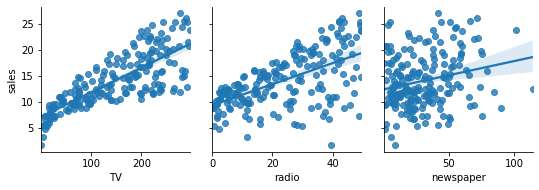

In [10]:
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', aspect = 1, kind='reg')

sns_pairplot parameters:

x_vars & y_vars take the variables for the x & y axes
aspect: used to size the graphs
kind: type of pairplot(reg = Linear regression)

Inference from pairplot:

Relationship between sales and TV is highly correlated therefore strong relationship. 

Relationship between sales and TV is notvery highly correlated therefore weak relationship.  

Relationship between sales and newspaper is comparatively very poorly correlated therefore very weak relationship.

In [11]:
advert.TV.corr(advert.sales)

0.7822244248616061

In [12]:
advert.radio.corr(advert.sales)

0.5762225745710551

In [13]:
advert.newspaper.corr(advert.sales)

0.22829902637616528

In [14]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

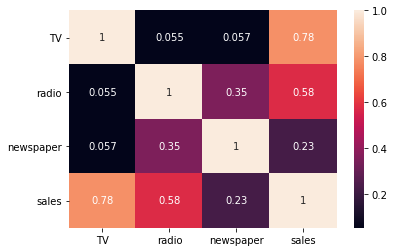

In [15]:
sns.heatmap(advert.corr(), annot = True)  # Pictorial representation of correlation

### Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions


The feature matrix(x) and response column(y) are prepared using pandas and scikit learn
Sckit learn requires x & y to be numpy arrays or pandas dataframe which is built over numpy.

In [16]:
X = advert[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [17]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [18]:
y = advert.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(150, 1)
(50, 1)
(150,)
(50,)


In [21]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

### Interpreting Model Coefficients

In [22]:
print(linreg.intercept_)      #beta0
print(linreg.coef_)          #beta1

6.91197261886872
[0.04802945]


Interpretation:

Beta1:

For a given amount of radio and new spaper AD spending a unit increase in TV Ads corresponds to a beta1(0.04802945) increase in sales.
This a statement of associatation not causation


### Making Predictions with our Model

In [23]:
y_pred = linreg.predict(X_test)
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

### Model Evaluation Metrics

First try a few examples to understand the model evaluation metrics

In [24]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [25]:
from sklearn import metrics                  #metric package is used for model evaluations metrics
print(metrics.mean_absolute_error(true,pred))

10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [26]:
print(metrics.mean_squared_error(true,pred))

150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [27]:
print(np.sqrt(metrics.mean_squared_error(true,pred)))

12.24744871391589


In [28]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.210929707703542
